In [1]:
using Distributions
using Random
using StatsPlots
default(fmt=:png)

function plot_lln_clt_median(dist, n; L=10^5)
    @show dist
    @show n
    @show m = median(dist) # population median
    @show s = 1/(2pdf(dist, m))
    @show se = s/√n # std of sample median
    @show normal = Normal(m, se)
    M = zeros(L)
    Xtmp = [zeros(n) for _ in 1:Threads.nthreads()]
    Threads.@threads for i in 1:L
        tid = Threads.threadid()
        X = rand!(dist, Xtmp[tid])
        M[i] = median(X)
    end
    P = stephist(M; norm=true, label="sample medians")
    plot!(xlim=(m - 5s, m + 5s))
    vline!([m]; label="population median", ls=:dash)
    title!("law of large numbers for median")
    Q = stephist(M; norm=true, label="sample medians")
    plot!(normal; label="normal approx.", ls=:dash)
    plot!(xlim=(m - 5se, m + 5se))
    title!("central limit theorem for median")
    plot(P, Q; size=(600, 600), layout=(2, 1))
end

plot_lln_clt_median (generic function with 1 method)

dist = Exponential{Float64}(θ=1.0)
n = 10
m = median(dist) = 0.6931471805599453
s = 1 / (2 * pdf(dist, m)) = 1.0
se = s / √n = 0.31622776601683794
normal = Normal(m, se) = Normal{Float64}(μ=0.6931471805599453, σ=0.31622776601683794)


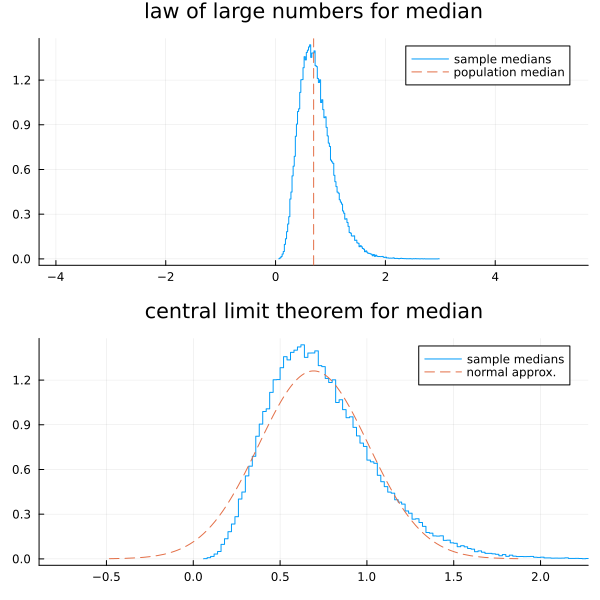

In [2]:
plot_lln_clt_median(Exponential(), 10)

dist = Exponential{Float64}(θ=1.0)
n = 30
m = median(dist) = 0.6931471805599453
s = 1 / (2 * pdf(dist, m)) = 1.0
se = s / √n = 0.18257418583505536
normal = Normal(m, se) = Normal{Float64}(μ=0.6931471805599453, σ=0.18257418583505536)


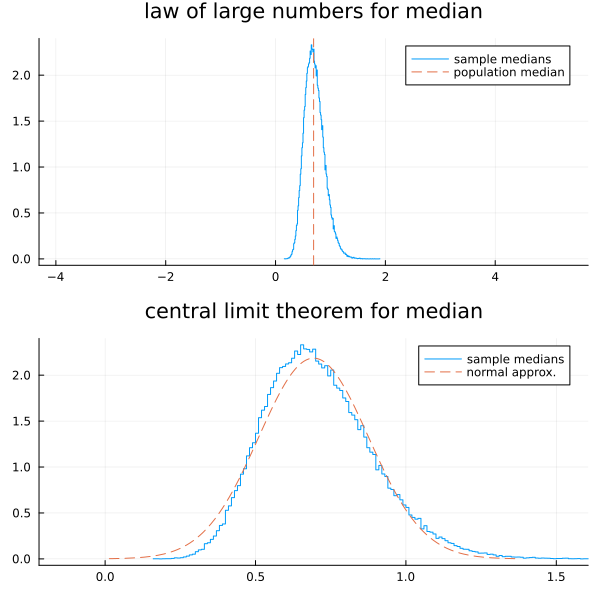

In [3]:
plot_lln_clt_median(Exponential(), 30)

dist = Exponential{Float64}(θ=1.0)
n = 100
m = median(dist) = 0.6931471805599453
s = 1 / (2 * pdf(dist, m)) = 1.0
se = s / √n = 0.1
normal = Normal(m, se) = Normal{Float64}(μ=0.6931471805599453, σ=0.1)


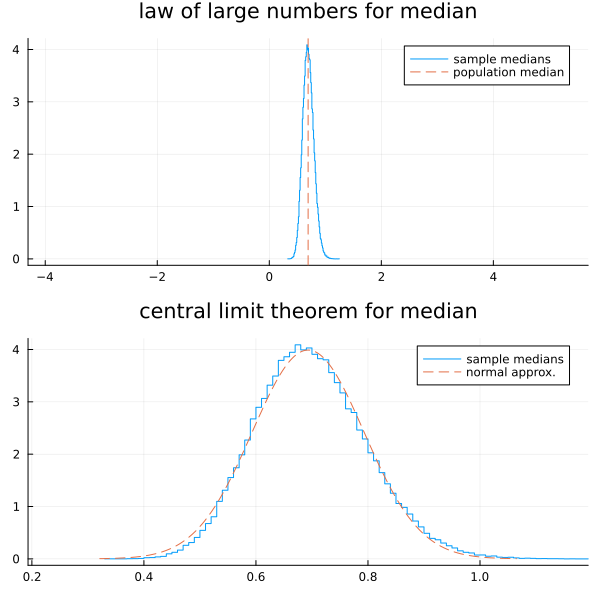

In [4]:
plot_lln_clt_median(Exponential(), 100)

dist = Exponential{Float64}(θ=1.0)
n = 300
m = median(dist) = 0.6931471805599453
s = 1 / (2 * pdf(dist, m)) = 1.0
se = s / √n = 0.05773502691896257
normal = Normal(m, se) = Normal{Float64}(μ=0.6931471805599453, σ=0.05773502691896257)


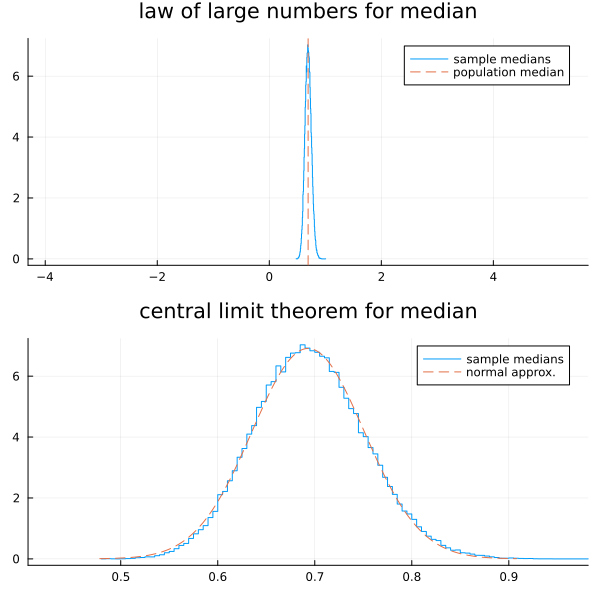

In [5]:
plot_lln_clt_median(Exponential(), 300)

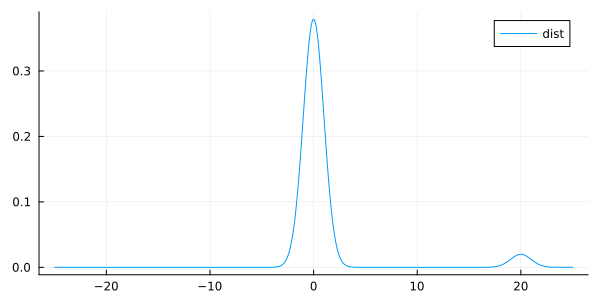

In [6]:
dist = MixtureModel([Normal(), Normal(20)], [0.95, 0.05])
plot(dist, -25, 25; label="dist", size=(600, 300))

dist = MixtureModel{Normal{Float64}}(K = 2)
components[1] (prior = 0.9500): Normal{Float64}(μ=0.0, σ=1.0)
components[2] (prior = 0.0500): Normal{Float64}(μ=20.0, σ=1.0)

n = 10
m = median(dist) = 0.06601181235964759
s = 1 / (2 * pdf(dist, m)) = 1.3221555891062091
se = s / √n = 0.41810230826973277
normal = Normal(m, se) = Normal{Float64}(μ=0.06601181235964759, σ=0.41810230826973277)


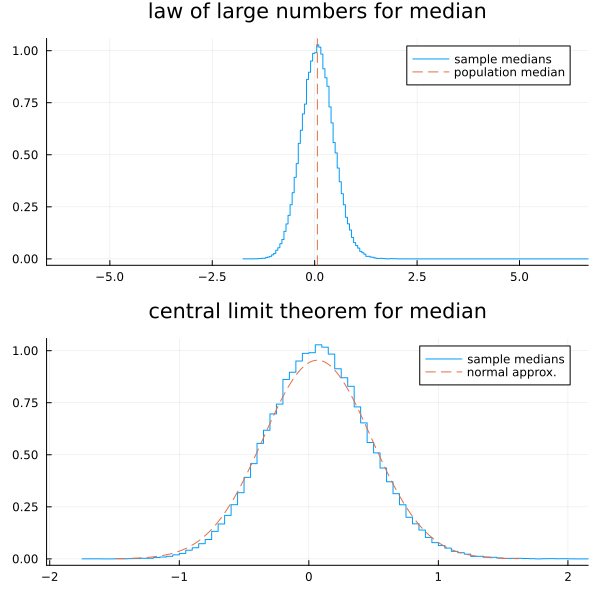

In [7]:
plot_lln_clt_median(dist, 10)

dist = MixtureModel{Normal{Float64}}(K = 2)
components[1] (prior = 0.9500): Normal{Float64}(μ=0.0, σ=1.0)
components[2] (prior = 0.0500): Normal{Float64}(μ=20.0, σ=1.0)

n = 30
m = median(dist) = 0.06601181235964759
s = 1 / (2 * pdf(dist, m)) = 1.3221555891062091
se = s / √n = 0.24139148022833412
normal = Normal(m, se) = Normal{Float64}(μ=0.06601181235964759, σ=0.24139148022833412)


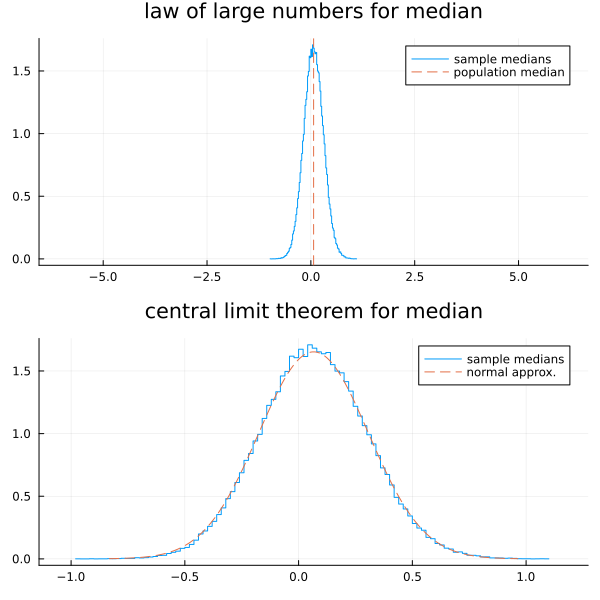

In [8]:
plot_lln_clt_median(dist, 30)

dist = MixtureModel{Normal{Float64}}(K = 2)
components[1] (prior = 0.9500): Normal{Float64}(μ=0.0, σ=1.0)
components[2] (prior = 0.0500): Normal{Float64}(μ=20.0, σ=1.0)

n = 100
m = median(dist) = 0.06601181235964759
s = 1 / (2 * pdf(dist, m)) = 1.3221555891062091
se = s / √n = 0.13221555891062092
normal = Normal(m, se) = Normal{Float64}(μ=0.06601181235964759, σ=0.13221555891062092)


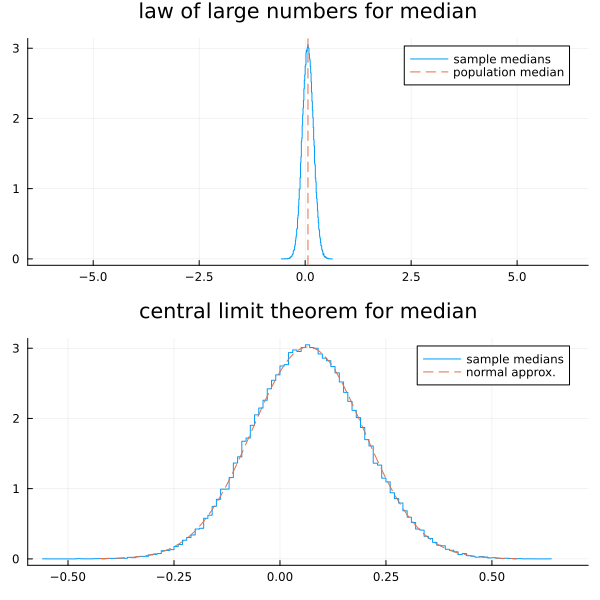

In [9]:
plot_lln_clt_median(dist, 100)

dist = MixtureModel{Normal{Float64}}(K = 2)
components[1] (prior = 0.9500): Normal{Float64}(μ=0.0, σ=1.0)
components[2] (prior = 0.0500): Normal{Float64}(μ=20.0, σ=1.0)

n = 300
m = median(dist) = 0.06601181235964759
s = 1 / (2 * pdf(dist, m)) = 1.3221555891062091
se = s / √n = 0.0763346885281038
normal = Normal(m, se) = Normal{Float64}(μ=0.06601181235964759, σ=0.0763346885281038)


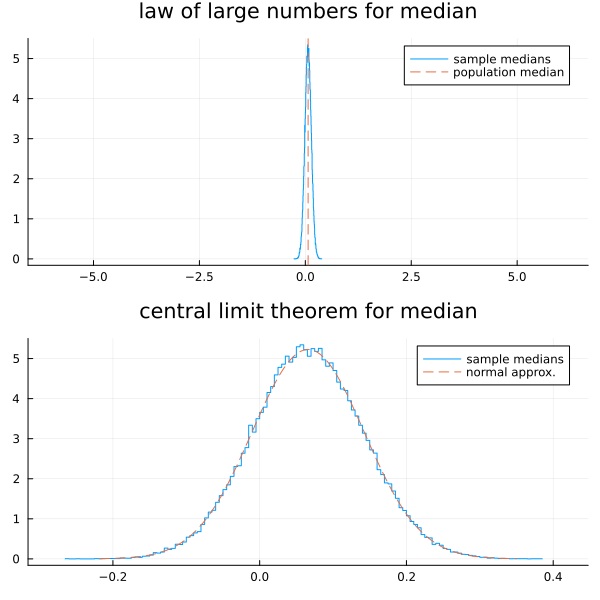

In [10]:
plot_lln_clt_median(dist, 300)